In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
%matplotlib inline

In [5]:
X,y = make_blobs(
    n_samples=1000,
    centers=3,
    n_features=2,
    random_state=42 
)

<Axes: >

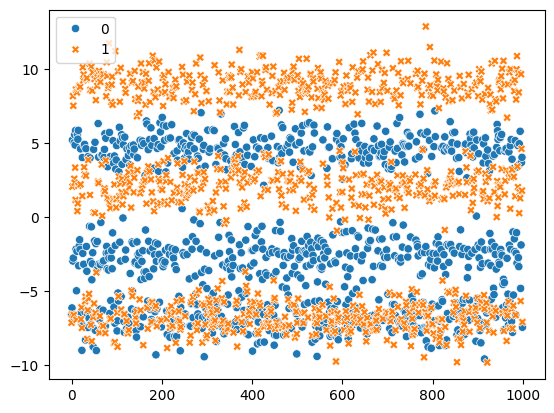

In [9]:
sns.scatterplot(X)

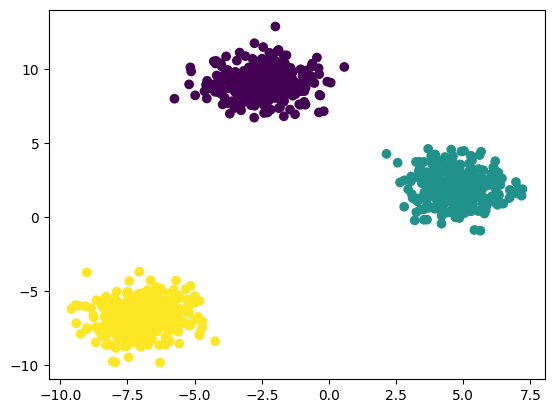

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [25]:
from sklearn.cluster import KMeans

# Elbow Method to slect the K value
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
    
print(wcss)

[1339.9999999999995, 424.779504284127, 43.53781728348884, 36.77494421802892, 34.362667605508406, 25.851245956067025, 26.586579306086325, 21.29546428089737, 20.605314406906125, 18.30979956420039]


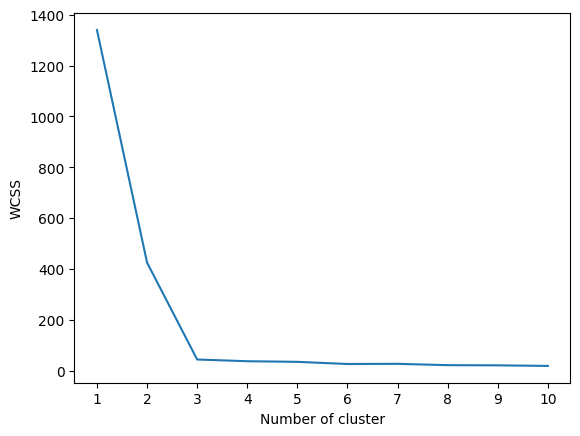

In [26]:
# plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [27]:
kmeans = KMeans(n_clusters=3, init="k-means++")
kmeans.fit_predict(X_train_scaled)

array([2, 0, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 0, 1, 2, 1, 2, 2, 0, 0, 0, 1, 2,
       2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 1,
       0, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1,
       1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2,
       1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2,
       1, 2, 2, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 0, 0, 1, 1, 0, 1,
       2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2,
       0, 0, 2, 1, 0, 2, 2, 1, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 2, 0, 1, 0,
       0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0,
       2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 1,

In [29]:
y_pred = kmeans.predict(X_test_scaled)

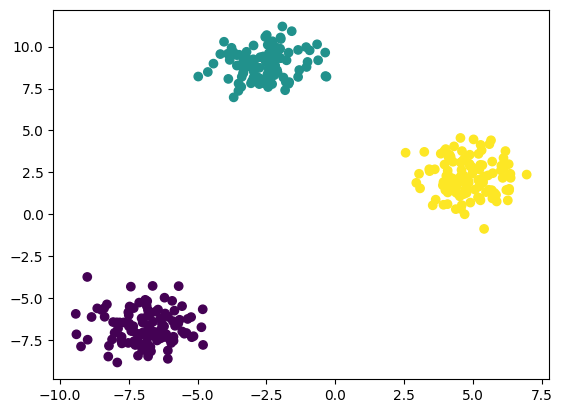

In [30]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred)

In [34]:
# knee locato
# silhiutee scoring
from kneed import KneeLocator

kl = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
kl.elbow

np.int64(3)

In [35]:
# silhoutte score

from sklearn.metrics import silhouette_score

silhouette_coeff = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhouette_coeff.append(score)

In [36]:
silhouette_coeff

[np.float64(0.6857199772837788),
 np.float64(0.842476016737992),
 np.float64(0.6774848579618135),
 np.float64(0.5089905696466652),
 np.float64(0.49147789337379777),
 np.float64(0.34151680426942116),
 np.float64(0.3368112756682253),
 np.float64(0.33623537352289856),
 np.float64(0.314390432836789)]

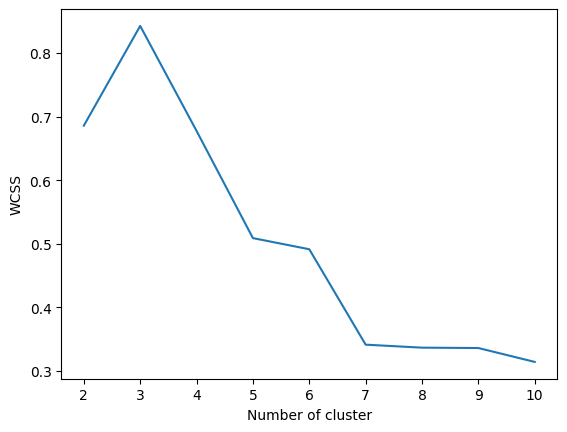

In [40]:
# plot the silhoutte curve
plt.plot(range(2, 11), silhouette_coeff)
plt.xticks(range(2, 11))
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")
plt.show()

In [17]:
from sklearn.cluster import KMeans
import numpy as np

# Random data
X = np.array([[1, 2], [2, 3], [3, 4], [10, 11], [11, 12], [12, 13], [50, 60], [60, 70]])

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Cluster labels
print(kmeans.labels_)

# Cluster centers
print(kmeans.cluster_centers_)


[0 0 0 2 2 2 1 1]
[[ 2.  3.]
 [55. 65.]
 [11. 12.]]
